# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [ ]:
#specify your environment path here
env_path = "D:/deep-reinforcement-learning/p1_navigation/Banana_Windows_x86_64/Banana.exe"
env = UnityEnvironment(file_name=env_path)

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
from agent import Agent
from datetime import datetime
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
import numpy as np


def DeepQLearnTrain(agent, n_episodes=100, print_range=10, eps_start=1.0, eps_end=0.01, eps_decay=0.995, early_stop=13, verbose=False):
    """Deep Q-Learning trainer.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        print_range (int): range to print partials results
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        early_stop (int): Stop training when achieve a defined score respecting 10 min n_episodes.
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=print_range)  # last 10 scores
    scores_mean = []
    eps = eps_start                    # initialize epsilon
    for i in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        
        while True:
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0] 
            agent.step(state, action, reward, next_state, done, i)
            state = next_state
            score += reward
            if done:
                break
                
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        if verbose:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i, np.mean(scores_window)), end="")
            if i % print_range == 0:
                print('\rEpisode {}\tAverage Score: {:.2f}'.format(i, np.mean(scores_window)))
            
        if np.mean(scores_window) >= early_stop and i > 10:
            if verbose:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i, np.mean(scores_window)))
            break
            
    return scores, i, np.mean(scores_window)


In [2]:
env = UnityEnvironment(file_name=env_path)

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
# number of actions
action_size = brain.vector_action_space_size

# examine the state space 
state = env_info.vector_observations[0]
state_size = len(state)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


C:\ProgramData\Anaconda3\envs\drlnd\lib\site-packages\torch\cuda\__init__.py:114: UserWarning: 
    Found GPU0 Tesla T4 which requires CUDA_VERSION >= 9000 for
     optimal performance and fast startup time, but your PyTorch was compiled
     with CUDA_VERSION 8000. Please install the correct PyTorch binary
     using instructions from http://pytorch.org
    
  warnings.warn(incorrect_binary_warn % (d, name, 9000, CUDA_VERSION))


Episode 10	Average Score: 0.10
Episode 20	Average Score: 0.80
Episode 30	Average Score: 0.20
Episode 40	Average Score: -0.10
Episode 50	Average Score: 0.000
Episode 60	Average Score: 1.20
Episode 70	Average Score: 1.50
Episode 80	Average Score: 1.70
Episode 90	Average Score: 1.80
Episode 100	Average Score: 1.60
Episode 110	Average Score: 3.40
Episode 120	Average Score: 3.70
Episode 130	Average Score: 5.20
Episode 140	Average Score: 4.20
Episode 150	Average Score: 3.60
Episode 160	Average Score: 6.00
Episode 170	Average Score: 5.40
Episode 180	Average Score: 5.60
Episode 190	Average Score: 5.50
Episode 200	Average Score: 6.30
Episode 210	Average Score: 5.20
Episode 220	Average Score: 6.40
Episode 230	Average Score: 6.70
Episode 240	Average Score: 7.10
Episode 250	Average Score: 7.70
Episode 260	Average Score: 8.10
Episode 270	Average Score: 7.40
Episode 280	Average Score: 9.60
Episode 290	Average Score: 7.200
Episode 300	Average Score: 8.70
Episode 310	Average Score: 8.40
Episode 320	Av

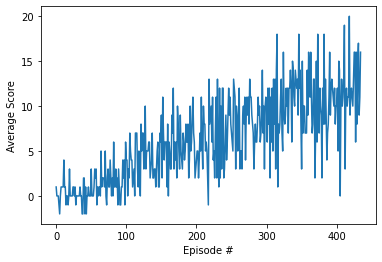

Wall time: 16min 54s


In [3]:
%%time




env_info = env.reset(train_mode=True)[brain_name]

agent = Agent(state_size=state_size, action_size=action_size, seed=199, nb_hidden=(64, 64),
              learning_rate=0.001, memory_size=int(1e6), prioritized_memory=False, batch_size=64,
              gamma=0.9, small_eps=0.03, update_frequency=4)

scores, episodes, last_avg_score = DeepQLearnTrain(agent, n_episodes=600, early_stop=13, verbose=True)

agent.save_model("bcmodel.pt")

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Average Score')
plt.xlabel('Episode #')
plt.savefig('bctraining.png')
plt.show()

# env.close()